Aluno: Gabriel Francsico de Oliveira Castro

Matrícula: 202066571

Bibliotecas e funções usadas

In [24]:
# Bibliotecas 

import tensorflow as tf
from d2l import tensorflow as d2l
d2l.use_svg_display()
import pdb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random
import numpy as np
import itertools

# Funções usadas

# 1
class MNIST(d2l.DataModule): #@save
    """The MNIST dataset."""
    def __init__(self, batch_size=64):
        super().__init__()
        self.save_hyperparameters()
        self.train, self.val = tf.keras.datasets.mnist.load_data()
        
# 2
@d2l.add_to_class(MNIST) #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
    tf.cast(y, dtype='int32'))
    # Se ATENTAR a essas variáveis aqui
    resize_fn = lambda X, y: (tf.image.resize_with_pad(X, *self.resize), y)
    shuffle_buf = len(data[0]) if train else 1
    return tf.data.Dataset.from_tensor_slices(process(*data)).batch(
        self.batch_size).shuffle(shuffle_buf)       
    
    
# Carregando a base de dados MNIST        
data = MNIST() # --> Base de dados carregadas com o MNIST
print(len(data.train[0]), len(data.val[0]))
print(data.train[0].shape)
            

60000 10000
(60000, 28, 28)


Existem 60.000 exemplos de dados de treinamento e 10.000 exemplos de dados de validação.

In [25]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

(64, 28, 28, 1) <dtype: 'float32'> (64,) <dtype: 'int32'>


Podemos obsrvar que existem 64 amostras (de treinamento ou validação) com dimensões de 28x28, ou seja, é uma foto 28x28.

        1) O que é o MNIST?

O MNIST é um conjunto de dados que contém imagens de dígitos manuscritos entre 0 e 9. Cada imagem é uma foto ,como vimos anteriormente, 28x28. Nesse sentido, iremos visualizar um exemplo contendo os números entre 0 a 9 apenas por uma questão de visualização.

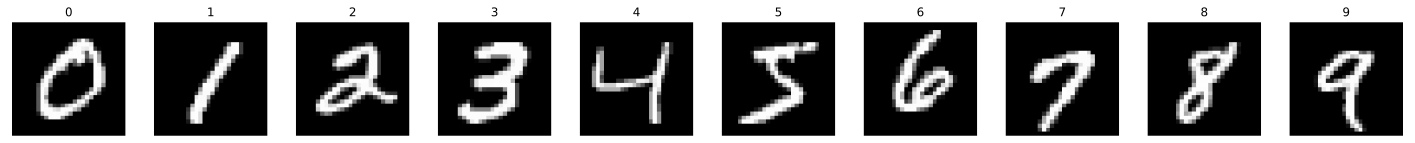

In [26]:
figura, eixos = plt.subplots(1, 10, figsize=(20, 2))
eixos = eixos.flatten()

for i in range(10):
    imagem = data.train[0][data.train[1] == i][0]  
    eixos[i].imshow(imagem, cmap='gray')
    eixos[i].set_title(i)
    eixos[i].axis('off')

plt.tight_layout()
plt.show()

        2) Modelos e Arquiteturas

**2a)** Perceptron com uma camada escondida, função de ativação sigmoide, função de custo SSE e otimização por descida de gradiente

A acurácia desse modelo e seus parâmetros é 94.97%


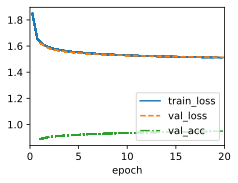

In [27]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr,loss_fn=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.SGD):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs,activation='sigmoid')])


# As 10 saídas, sendo números de 0 a 9 
modelo = MLP(num_outputs = 10, num_hiddens = 128, lr=0.5)

treinamento = d2l.Trainer(max_epochs=20)
treinamento.fit(modelo,data)

test_acc = d2l.evaluate_accuracy(modelo, data.val_dataloader())

print(f"A acurácia desse modelo e seus parâmetros é {test_acc*100:.2f}%")

**2b)** Saída do tipo softmax e custo de entropia cruzada

A acurácia desse modelo e seus parâmetros é 95.62%


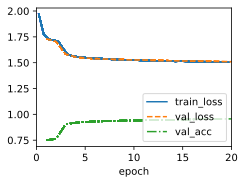

In [28]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr,loss_fn=tf.keras.losses.SparseCategoricalCrossentropy,optimizer=tf.keras.optimizers.SGD):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens,activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])
        
        

modelo = MLP(num_outputs = 10, num_hiddens = 128, lr=0.5)

treinamento = d2l.Trainer(max_epochs=20)
treinamento.fit(modelo,data)

test_acc = d2l.evaluate_accuracy(modelo, data.val_dataloader())

print(f"A acurácia desse modelo e seus parâmetros é {test_acc*100:.2f}%")

**2c)** Optimizer Adam

A acurácia com esse parâmetro é 86.75%


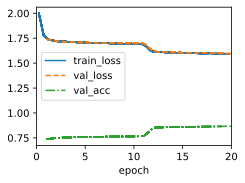

In [29]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr,loss_fn=tf.keras.losses.SparseCategoricalCrossentropy,optimizer=tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens,activation='sigmoid'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])
        
        

modelo = MLP(num_outputs = 10, num_hiddens = 128, lr=0.5)

treinamento = d2l.Trainer(max_epochs=20)
treinamento.fit(modelo,data)

test_acc = d2l.evaluate_accuracy(modelo, data.val_dataloader())
print(f"A acurácia com esse parâmetro é {test_acc*100:.2f}%")

**2d)** Função Relu

A acurácia com esse parâmetro é 97.73%


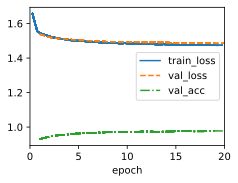

In [30]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr,loss_fn=tf.keras.losses.SparseCategoricalCrossentropy,optimizer=tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs, activation='softmax')])
            
            
modelo = MLP(num_outputs = 10, num_hiddens = 128, lr=0.5)

treinamento = d2l.Trainer(max_epochs=20)
treinamento.fit(modelo,data)


test_acc = d2l.evaluate_accuracy(modelo, data.val_dataloader())
print(f"A acurácia com esse parâmetro é {test_acc*100:.2f}%")

**2e)** Redes Maiores

A acurácia com esses parâmetro é 97.86%


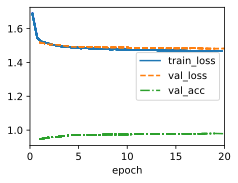

In [31]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr,loss_fn=tf.keras.losses.SparseCategoricalCrossentropy,optimizer=tf.keras.optimizers.Adam):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs,activation='softmax')])
            
            
modelo = MLP(num_outputs = 10, num_hiddens = 256, lr=0.5)

treinamento = d2l.Trainer(max_epochs=20)
treinamento.fit(modelo,data)

test_acc = d2l.evaluate_accuracy(modelo, data.val_dataloader())
print(f"A acurácia com esses parâmetro é {test_acc*100:.2f}%")

        3) Visualização

Vamos observar alguns exemplos mal-classificados. Primeiro, vamos utilizar o modelo presente no tópico 2e (Redes Maiores), faremos isso porque esse modelo teve a maior a acurácia. Em seguida, vamos escolher aleatoriamente 9 previsões erradas para analisar.

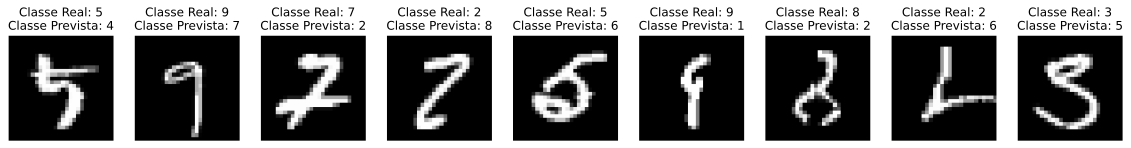

In [40]:
exemplos_incorretos = []  # --> Vamos armazenar todos os exemplos classificados de maneira errada aqui
total_erros = 0
total_de_previsoes = 0  

# Percorrer todos os minibatches 
for X, y in data.val_dataloader():
    preds = tf.argmax(modelo(X), axis=1)
    errados = tf.cast(preds, y.dtype) != y
    total_de_previsoes += len(y)  

    for i in range(len(errados)):
        if errados[i]:
            exemplos_incorretos.append((X[i], int(y[i]), int(preds[i])))
            total_erros += 1

# Escolher aleatoriamente n exemplos para visualização
exemplos_para_visualizar = random.sample(exemplos_incorretos, k=min(9, len(exemplos_incorretos)))

fig, axes = plt.subplots(1, len(exemplos_para_visualizar), figsize=(20, 2))
for i, exemplo in enumerate(exemplos_para_visualizar):
    img, label, pred = exemplo
    img_np = img.numpy()  # Convertendo para um array NumPy
    img_np_squeezed = np.squeeze(img_np)  # Remover dimensões de tamanho 1
    axes[i].imshow(img_np_squeezed, cmap='gray')  
    #axes[i].set_title(f"Número: {label}, Previsto: {pred}")
    axes[i].set_title(f"Classe Real: {label}\nClasse Prevista: {pred}", y=1.0)
    axes[i].axis('off')

plt.show()



In [37]:
a = total_erros/total_de_previsoes
print(f"Encontramos {total_erros} erros em todos os minibatchs e fizemos um total {total_de_previsoes} de previsões")
print(
    
)
print(f"Encontramos uma acurácia de {(1-a)*100}%")

Encontramos 214 erros em todos os minibatchs e fizemos um total 10000 de previsões

Encontramos uma acurácia de 97.86%


Visualizando alguns dos erros, podemos concluir que é altamente provável que um ser humano cometa alguns dos mesmos equívocos. Isso se deve ao fato dos números serem escritos à mão, o que pode levar a variações na caligrafia as quais podem gerar algumas confusões (como no primeiro exemplo acima onde é possível observar que o caractere seria facilmente confundido com um número `'6'` ou no nono onde a confusão é de `'3'` com `'5'` é totalmente justificável).

Isso ressalta como a variabilidade na caligrafia humana pode levar a interpretações equivocadas. Portanto, é extremamente compreensível que um modelo desenvolvido de forma computacional possa cometer alguns erros e, consequntemente fazer  classificações incorretas. Haja vista que um humano muito provavelmente cometeria esses mesmos erros de maneira geral. Todavia, é importante ressaltar que existem alguns exemplos onde as confusões criadas não são tão justificáveis.
    
Além disso, poderemos observar melhor alguns padroões encontrados nos erros de maneira mais clara depois de visualizarmos a matriz de confusão.

        4) Matriz de confusão

Primeiramente, uma matriz de confusão é uma tabela usada para avaliar a performance de um modelo de classificação. Todavia, para facilitar a visualização vamos plotar uma espécie de mapa de calor com o qual poderemos visualizar de maneira mais intuitiva e mais clara o desempenho do nosso modelo 

In [39]:
A = 0


todos_os_rotulos_reais = []
todas_as_previsoes = []

for X, y in data.val_dataloader():
    previsoes = tf.argmax(modelo(X), axis=1)
    todos_os_rotulos_reais.extend(y.numpy())
    todas_as_previsoes.extend(previsoes.numpy())


matriz_de_confusao = confusion_matrix(todos_os_rotulos_reais, todas_as_previsoes)



if A == 0:
    print("Para visualizar a Matriz de confusão em forma de matriz mude o valor de A")
else:
    # Mostrar a matriz de confusão
    print("Matriz de Confusão -->")
    print(
    
    )
    print(matriz_de_confusao)


Para visualizar a Matriz de confusão em forma de matriz mude o valor de A


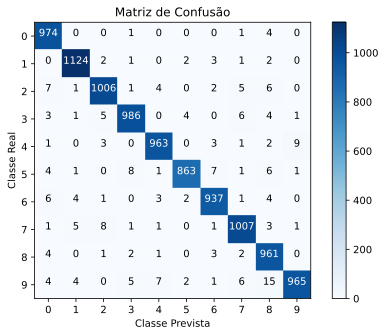

In [35]:
plt.imshow(matriz_de_confusao, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()

# Definindo os rótulos dos eixos
classes = np.arange(10)
plt.xticks(classes, classes)
plt.yticks(classes, classes)

limiar = matriz_de_confusao.max() / 2.
for i, j in itertools.product(range(matriz_de_confusao.shape[0]), range(matriz_de_confusao.shape[1])):
    plt.text(j, i, format(matriz_de_confusao[i, j], 'd'),
             horizontalalignment="center",
             color="white" if matriz_de_confusao[i, j] > limiar else "black")

plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.tight_layout()
plt.show()


Observando o mapo de calor de confusões recorrentes, é notável que alguns casos se repetem mais que os outros. Estes são as confusões 
envolvendo os números `'9'` e `'4'` - `'5'` e `'3'` - `'2'` e `'8'` - `'8'` e `'9'` ,estes números podem possuir formas semelhantes quando escritos à mão, dependendo da caligrafia do escritor. Nesse viés, essa similaridade na forma pode dificultar a distinção entre esses dígitos, tanto para um modelo de classificação quanto para um observador humano. Portanto, essas confusões fazem total sentido, uma vez que os própios seres humanos também teriam certa dificuldades à depender da caligrafia.